<a href="https://colab.research.google.com/github/Madeira-International-Workshop-in-ML/2021_day_1/blob/main/Introduction_to_ANN_using_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is an ANN?

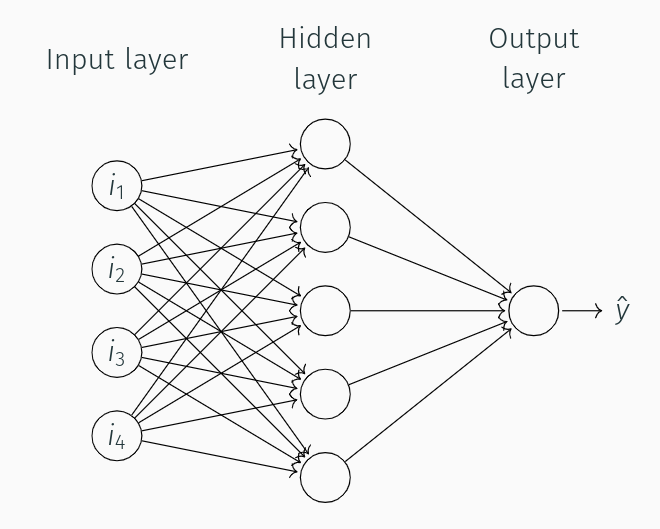

An ANN is a biologically inspired model that enables a system to learn, as living animals do, from observational data.

ANNs are composed of artificial neurons interconnected by synaptic connections and organised in layers, typically an input layer, some hidden layers, and an output layer. Mathematically, an ANN is basically a directed graph with vertices and edges.

Every synaptic connection, in turn, has a weight, also known as strength, that will be adjusted according to the examples provided and the feedback from the error (i.e., the difference between the estimated, and the true target values). This process is known as **training**.

ANNs with only one hidden layer are called **shallow networks**. However, when the number of hidden layers is higher than one, then the ANN is called a **deep network**.

---

Each neuron in an ANN performs two functions: (a) **transfer function**; (b) **activation function**.

The transfer function of neuron $i$ is given by a weighted sum of the neuron signals $\boldsymbol{x}$, i.e.,
\begin{equation}
T_i = \sum^{n}_{j=1} w_{ji} \cdot x_j,
\end{equation}
where $n$ is the total number of neurons of the preceding layer, $w_{ji}$ the weight of the synaptic connections between the neuron $j$ and neuron $i$, and $x_j$ the neuron signal of neuron $j$ of the preceding layer.

After the transfer function has been computed, an activation function $\phi$ is applied to the transfer function, and the neuron's output is obtained, such that:
\begin{equation}
O_i = \phi \Big (T_i \Big).
\end{equation}

This output is then transmitted to the following neurons of the next layer, until the output layer. This transmission process is known as **forward propagation**.

As the name implies, an activation function is responsible for activating or deactivating neuron units. There are two types of activation functions: linear (also known as identity function) and non-linear. In regression, hidden layers apply non-linear activation functions (e.g., hyperbolic tangent), whereas the output layer applies a linear activation function so that the final output is not restricted to the range of values of the previous activation function. For classification, however, the final layer should apply an activation function in the domain $[0,1]$ (e.g., softmax).


---

After the **forward propagation**, the **back propagation** takes place and is responsible for:
- output error calculation and backpropagation to input neurons;
- update of weights through an optimization algorithm (e.g., gradient descent).

## In a nutshell

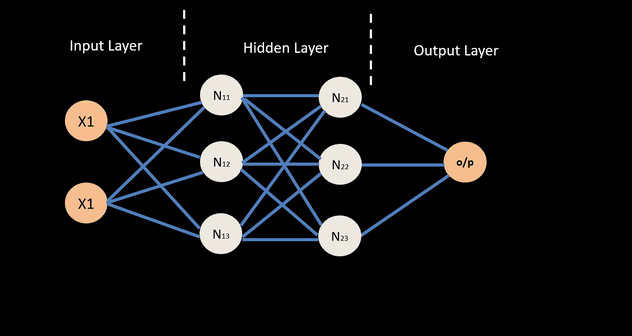

*Source:* Machine Learning Knowledge

# Types of Machine-Learning problems

- **Supervised learning**: Models that can predict labels based on labeled training data
    - **Classification**: Models that predict labels as two or more discrete categories
    - **Regression**: Models that predict continuous labels
- **Unsupervised learning**: Models that identify structure in unlabeled data
    - **Clustering**: Models that detect and identify distinct groups in the data
    - **Dimensionality reduction**: Models that detect and identify lower-dimensional structure in higher-dimensional data
    
All taken from: VanderPlas, Jake. *Python Data Science Handbook: Essential Tools for Working with Data*. O'Reilly Media, Inc., 2016.

# What we are going to see today?

>[What is an ANN?](#scrollTo=ZxcTMRSV2dLj)

>>[In a nutshell](#scrollTo=qKN5lM-u3PTs)

>[Types of Machine-Learning problems](#scrollTo=z0NnPMwnqzG1)

>[What we are going to see today?](#scrollTo=slWbe0SLsROB)

>[Introduction to ANN using scikit-learn](#scrollTo=NWbiSJ82HuVD)

>>[How to use Scikit-Learn?](#scrollTo=GeMxphlns0OC)

>>[Regression](#scrollTo=gFFJqmlRtH23)

>>>[How can we improve these results?](#scrollTo=LKqSqE_VJTbp)

>>>>[Data normalization](#scrollTo=G7n9f8KkJXEJ)

>>>>[Data standardization](#scrollTo=KKENaYRMK-M5)

>>>[Feature selection](#scrollTo=6Pjv3op2NFmJ)

>>>[Grid search](#scrollTo=BaYxILKyPpRp)

>>[Classification](#scrollTo=rDHAZCMYtK6d)

>>>[What should be the output of the network?](#scrollTo=Xs0Ln9Lugo7N)

>>>[Confusion Matrix](#scrollTo=dp0okTFgr8o5)



# Introduction to ANN using scikit-learn

## How to use Scikit-Learn?

1. Arrange data into training and testing datasets;
- E.g.: ``X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)``.
2. Choose the model to be used:
- E.g.: ``from sklearn.linear_model import LinearRegression``.
3. Choose model hyper-parameters;
- E.g.: ``model = LinearRegression(fit_intercept=True)``.
4. Fit the data using ``fit()``;
- E.g.: ``model.fit(X_train, y_train)``.
5. Predict data using ``predict()`` or ``transform()``.
- E.g.: ``y_pred_train = reg.predict(X_train)``.
6. Assess the model on the testing datasets.
- E.g.: ``mse_train = mean_squared_error(y_train, y_pred_train)``.

In [ ]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## Regression

In [ ]:
X, y = load_boston(return_X_y=True)  # this will load the "Boston" dataset. This dataset contains information concerning housing in the area of Boston. The objective is to predict the price, given 13 attributes (e.g., per capita crime)

In [ ]:
# Arrange data into training and testing datasets
# Let's use 70 % for training and 30 % for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Choose model hyper-parameters
regr = MLPRegressor(max_iter=5000, solver='adam', activation='relu', hidden_layer_sizes=(100, 10))

In [ ]:
# Fit the data using `fit()`. 10 % of the training dataset will be used for validation
regr.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
regr.out_activation_  # as you can see, the activation function of the output layer is the identity function (range=[-inf,inf])

'identity'

In [ ]:
# Predict data using `predict`
y_pred = regr.predict(X_test)

In [ ]:
# Assess the model on the testing dataset
mse = mean_squared_error(y_test, y_pred)
r2 = regr.score(X_test, y_test)

print(f'Results on testing dataset. MSE: {mse:.2f} and R2: {r2:.2f}')

Results on testing dataset. MSE: 26.59 and R2: 0.73


### How can we improve these results?

#### Data normalization

Scales all the features for a given range.


In [ ]:
scaler = MinMaxScaler(feature_range=(0.01, 1))
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0.01, 1))

In [ ]:
X_train_scl = scaler.transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
# Choose model hyper-parameters
regr_scl = MLPRegressor(max_iter=5000, solver='adam', activation='relu', hidden_layer_sizes=(100, 10))

In [ ]:
# Fit the data using `fit()`. 10 % of the training dataset will be used for validation
regr_scl.fit(X_train_scl, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
# Predict data using `predict`
y_pred_scl = regr_scl.predict(X_test_scl)

In [ ]:
# Assess the model on the testing dataset
mse = mean_squared_error(y_test, y_pred_scl)
r2 = regr_scl.score(X_test_scl, y_test)

print(f'Results on testing dataset. MSE: {mse:.2f} and R2: {r2:.2f}')

Results on testing dataset. MSE: 16.96 and R2: 0.83


#### Data standardization

Standardization of a dataset involves rescaling the distribution of values so that the mean of the observed values is 0, and the standard deviation is 1.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
# Choose model hyper-parameters
regr_std = MLPRegressor(max_iter=5000, solver='adam', activation='relu', hidden_layer_sizes=(100, 10))

In [ ]:
# Fit the data using `fit()`. 10 % of the training dataset will be used for validation
regr_std.fit(X_train_std, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
# Predict data using `predict`
y_pred_std = regr_std.predict(X_test_std)

In [ ]:
# Assess the model on the testing dataset
mse = mean_squared_error(y_test, y_pred_std)
r2 = regr_std.score(X_test_std, y_test)

print(f'Results on testing dataset. MSE: {mse:.2f} and R2: {r2:.2f}')

Results on testing dataset. MSE: 13.28 and R2: 0.87


### Feature selection

In [ ]:
selector = VarianceThreshold(0.7)
selector.fit(X_train)

VarianceThreshold(threshold=0.7)

In [ ]:
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

In [ ]:
# Choose model hyper-parameters
regr_sel = MLPRegressor(max_iter=5000, solver='adam', activation='relu', hidden_layer_sizes=(100, 10))

In [ ]:
# Fit the data using `fit()`. 10 % of the training dataset will be used for validation
regr_sel.fit(X_train_sel, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
# Predict data using `predict`
y_pred_sel = regr_sel.predict(X_test_sel)

In [ ]:
# Assess the model on the testing dataset
mse = mean_squared_error(y_test, y_pred_sel)
r2 = regr_sel.score(X_test_sel, y_test)

print(f'Results on testing dataset. MSE: {mse:.2f} and R2: {r2:.2f}')

Results on testing dataset. MSE: 32.19 and R2: 0.68


### Grid search

The grid search performs an exhaustive search to select the best combination of parameters, by testing all the combinations possible.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = MLPRegressor()
param_grid = {'hidden_layer_sizes': [100, (10, 10), (20, 20)],
              'activation':         ['logistic', 'tanh', 'relu'],
              'solver':             ['lbfgs', 'sgd', 'adam']}

In [ ]:
grid = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', n_jobs=-1)  # perform grid search with two-fold validation
grid.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
grid.best_params_  # exports the best parameters

{'activation': 'relu', 'hidden_layer_sizes': (20, 20), 'solver': 'lbfgs'}

## Classification

In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [ ]:
X, y = fetch_openml('mnist_784', version=1,
                    return_X_y=True)  # this will load the "Digits" dataset. This dataset contains handwritten digits and the objective is to recognize them

In [ ]:
X.shape  # 28 * 28 pixels

(70000, 784)

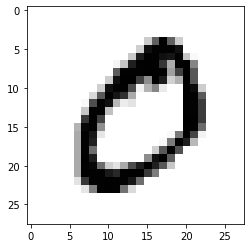

In [ ]:
# Let's see one example
plt.imshow(X[1].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [ ]:
X[1].reshape(28, 28)  # this is an array of 28 elements of 28 elements

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [ ]:
# Let's see what is inside of Y
y[1:11]

array(['0', '4', '1', '9', '2', '1', '3', '1', '4', '3'], dtype=object)

### What should be the output of the network?

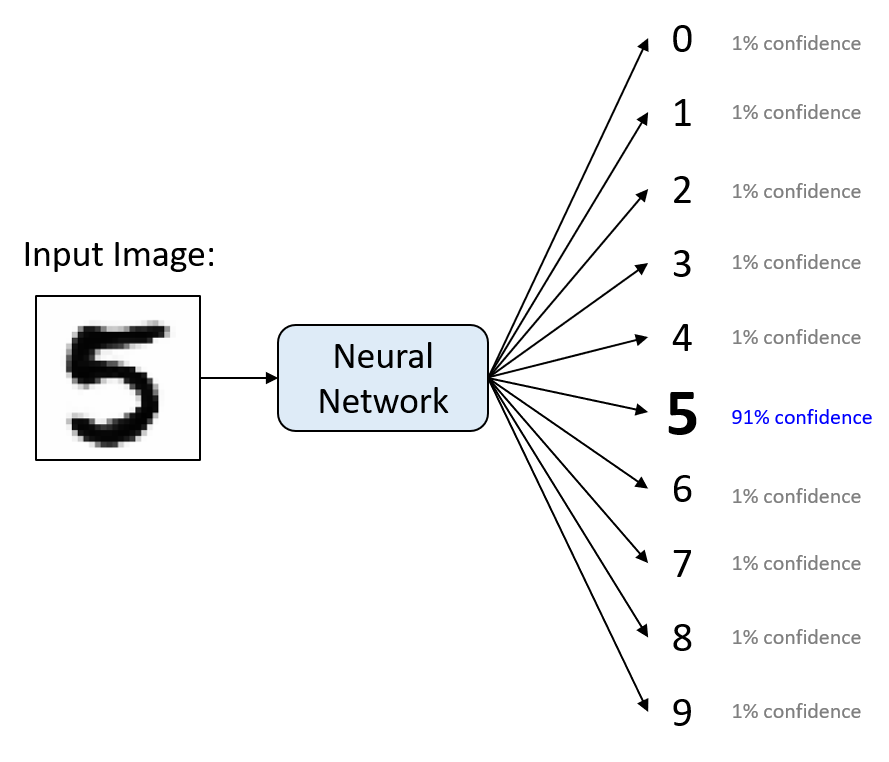

In [ ]:
# Arrange data into training and testing datasets
# Let's use 70 % for training and 30 % for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Choose model hyper-parameters
clf = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(100,), max_iter=300)

In [ ]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0.01, 1))
scaler.fit(X_train)

X_train_scl = scaler.transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
# Fit the data using `fit()`. 10 % of the training dataset will be used for validation
clf.fit(X_train_scl, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
clf.out_activation_  # as you can see, the activation function of the output layer is the softmax function (range=[0,1])

'softmax'

In [ ]:
# Predict data using `predict`
y_pred_scl = clf.predict(X_test_scl)

In [ ]:
y_pred_scl[2]  # the predict function will return the output with the highest confidence

'0'

In [ ]:
y_pred_prob = clf.predict_proba(X_test_scl)  # however, the output of the network still has 10 elements
y_pred_prob[2]

array([1.00000000e+00, 7.05781511e-20, 3.02673937e-11, 3.19358049e-18,
       5.41275508e-25, 3.54834089e-18, 3.25813409e-10, 9.92123813e-17,
       1.81767018e-16, 5.83037238e-18])

In [ ]:
np.argmax(y_pred_prob[2])

0

### Confusion Matrix

**For binary classification:**
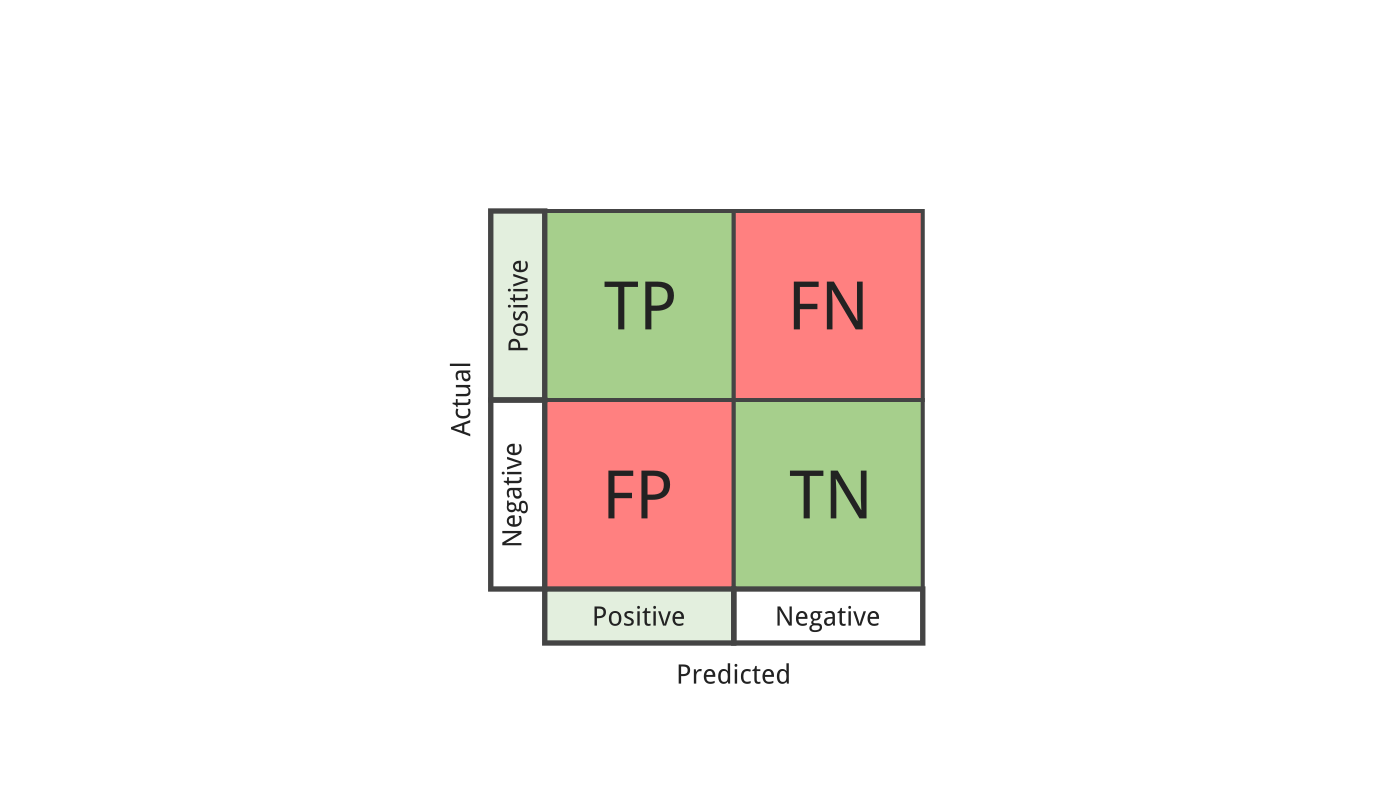

**For multi-class classification:**
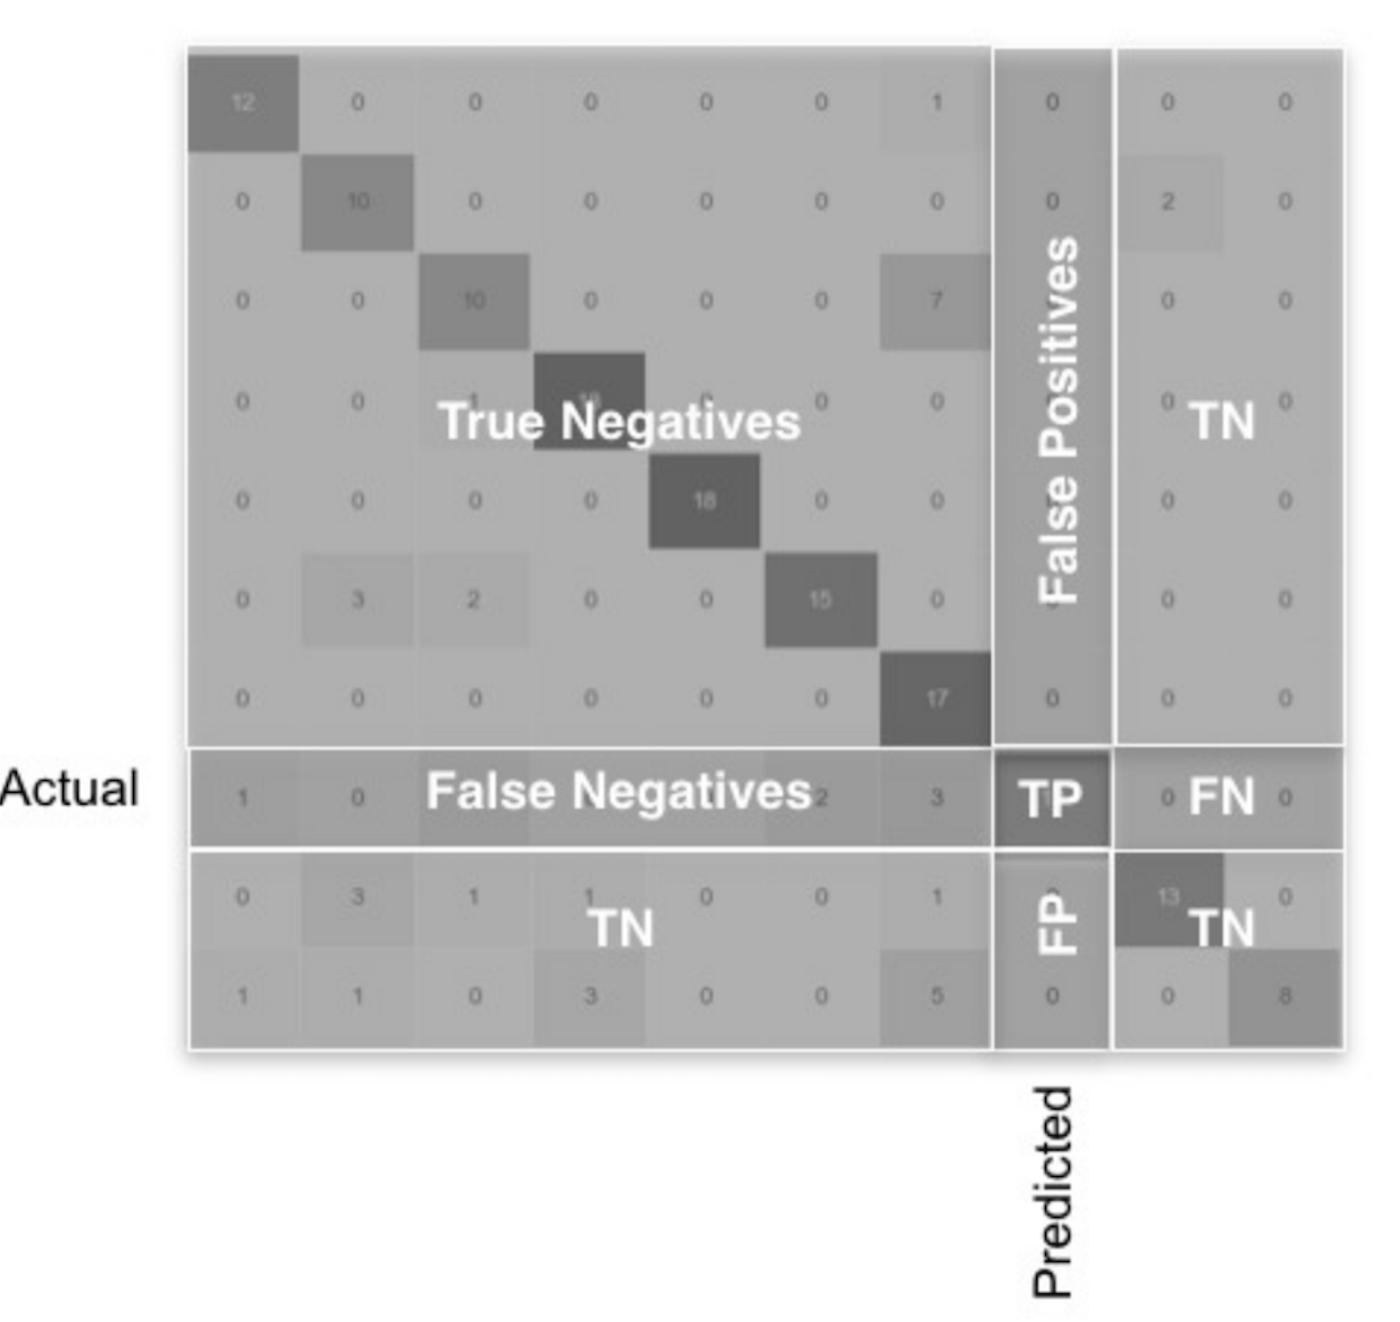


*Source*: Towards Data Science




In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_scl)
conf_matrix

array([[2056,    1,    3,    1,    1,    3,    5,    3,    3,    2],
       [   1, 2361,    7,    5,    4,    1,    1,    4,    2,    4],
       [   3,    5, 2002,   14,    2,    3,    3,    9,    9,    2],
       [   3,    3,   11, 2032,    2,   25,    0,   11,   14,   12],
       [   1,    5,    5,    5, 1976,    1,    5,    6,    4,   26],
       [   3,    1,    3,   11,    5, 1845,    9,    1,   11,    6],
       [   9,    2,    1,    0,    7,   12, 1968,    1,    6,    0],
       [   2,    4,    9,    4,    7,    0,    0, 2171,    4,   10],
       [  11,   11,    9,   13,    6,    8,    1,    4, 1994,   13],
       [   5,    3,    2,    8,   18,    7,    0,   24,    5, 2079]])

In [ ]:
mul_conf_matrix = multilabel_confusion_matrix(y_test, y_pred_scl)  # do the same thing but for multiclass to extract, for each class, TP, FN, FP, and TN

tp = mul_conf_matrix[:, 0, 0]
fn = mul_conf_matrix[:, 0, 1]
fp = mul_conf_matrix[:, 1, 0]
tn = mul_conf_matrix[:, 1, 1]

In [ ]:
sensitivity = (tp / (tp + fn)) * 100  # measures the proportion of positives that are correctly identified (e.g., 1 as being 1)
specificity = (tn / (tn + fp)) * 100  # measures the proportion of negatives that are correctly identified (e.g., classified as *not* being 1, and the number being different than 1)
accuracy = ((tp + tn) / (tp + tn + fp + fn)) * 100